In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.shape

(27820, 12)

In [4]:
## Summarizing the data
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
## Renaming some columns for better interpretation
df.rename(columns={" gdp_for_year ($) ":
                  "gdp_for_year", "gdp_per_capita ($)":
                  "gdp_per_capita"}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Text(0, 0.5, 'suicides_no')

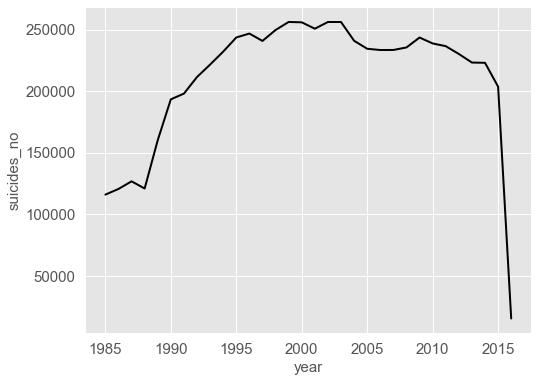

In [6]:
## Suicides number curve (1985-2016)
ns = df['suicides_no'].groupby(df.year).sum()
ns.plot(figsize=(8,6), linewidth=2, fontsize=15,color='black')
plt.xlabel('year', fontsize=15)
plt.ylabel('suicides_no',fontsize=15)

ConversionError: Failed to convert value(s) to axis units: '1985'

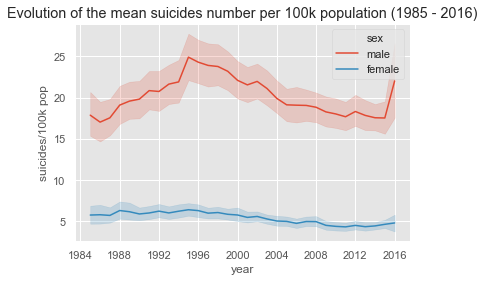

In [7]:
## Mean suicides number by gender and 100k population
df["year"] = pd.to_datetime(df["year"], format = "%Y")
data = df.groupby(["year", "sex"]).agg("mean").reset_index()
sns.lineplot(x = "year", y = "suicides/100k pop", hue = "sex", data = df)
plt.title("Evolution of the mean suicides number per 100k population (1985 - 2016)")
plt.xlim('1985', '2015')

ConversionError: Failed to convert value(s) to axis units: '1985'

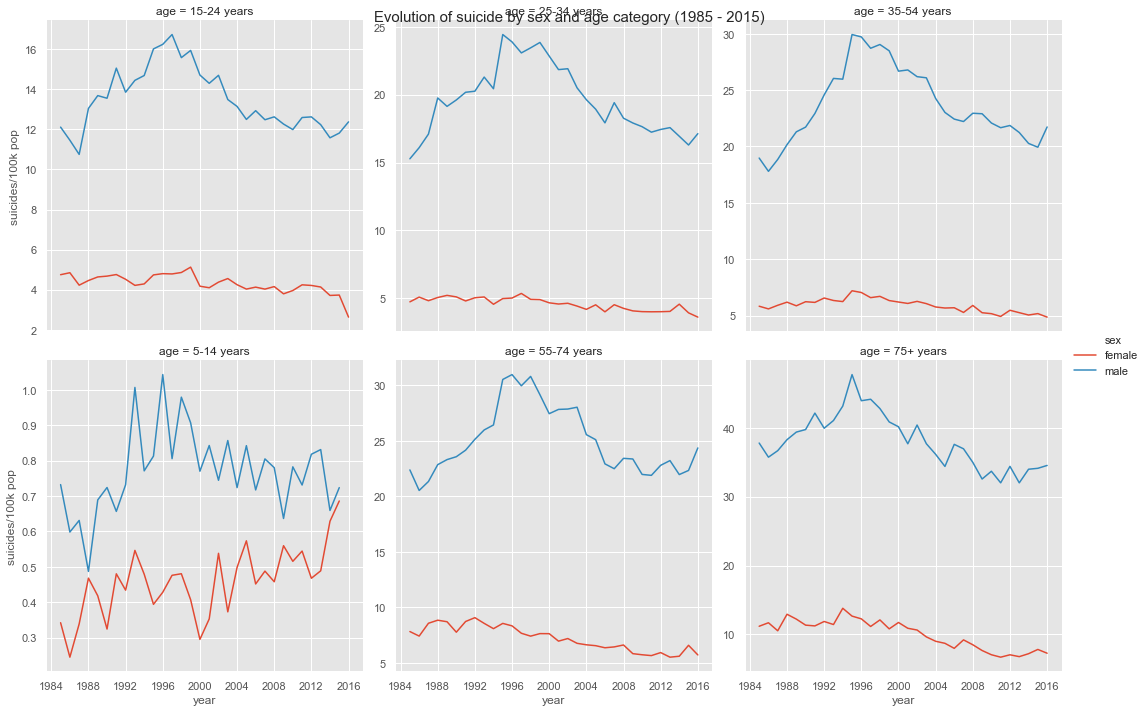

In [12]:
df = df.groupby(["year", "sex", "age"]).agg("mean").reset_index()

sns.relplot(x = "year", y = "suicides/100k pop", 
            hue = "sex", col = "age", col_wrap = 3, data = df, 
            facet_kws=dict(sharey=False), kind = "line")
plt.suptitle("Evolution of suicide by sex and age category (1985 - 2015)", size=15)
plt.xlim('1985', '2015')
plt.subplots_adjust(top = 0.9)

In [97]:
## Number of suicides in 1985
year_1985 = df[(df['year'] == 1985)]
year_1985 = year_1985.groupby('country')[['suicides_no']].sum().reset_index()

## Sorting values in ascending order
year_1985 = year_1985.sort_values(by='suicides_no', ascending=False)

## Styling output dataframe
year_1985.style.background_gradient(cmap='Purples', subset=['suicides_no'])

KeyError: 'country'

In [98]:
#Number of suicides in 2016
year_2016 = df[(df['year'] == 2016)]
year_2016 = year_2016.groupby('country')[['suicides_no']].sum().reset_index()

# Sort values in ascending order
year_2016 = year_2016.sort_values(by='suicides_no', ascending=False)

# Styling output dataframe
year_2016.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

KeyError: 'country'

KeyError: 'generation'

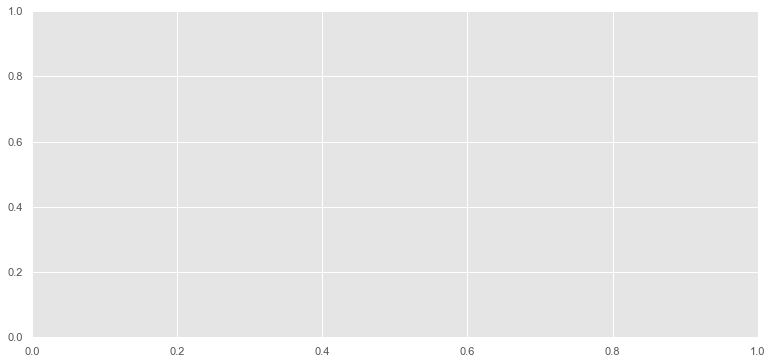

In [99]:
## Suicides number by generation and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['generation'], y = 'suicides_no',
                  hue='sex',data=df, palette='autumn')

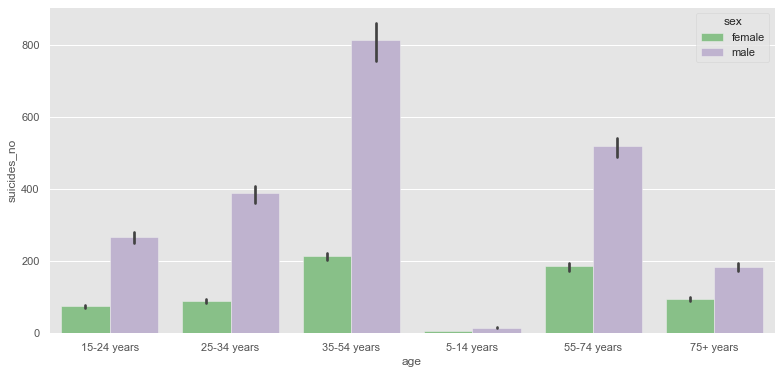

In [73]:
## Suicides number by age and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['age'], y = 'suicides_no',
                  hue='sex',data=df, palette='Accent')

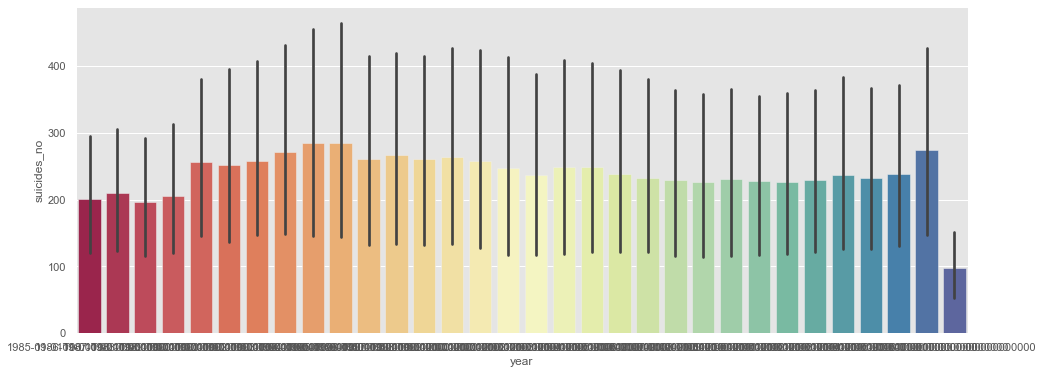

In [74]:
## Suicides number by year
f,ax = plt.subplots(1,1,figsize=(16,6))
ax = sns.barplot(x = df['year'], y = 'suicides_no',
                data=df, palette='Spectral')

In [75]:
data = df['suicides_no'].groupby(df.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(10,14))
ax = sns.barplot(data.head(10), data.head(10).index, palette='Reds_r')

AttributeError: 'DataFrame' object has no attribute 'country'

In [76]:
data = df['suicides_no'].groupby(df.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(10,14))
ax = sns.barplot(data.tail(10),data.tail(10).index,palette='Blues_r')

AttributeError: 'DataFrame' object has no attribute 'country'